In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.datasets import make_classification

from sklearn import cross_validation
from sklearn.metrics import accuracy_score,f1_score
import math

In [106]:
import warnings; warnings.simplefilter('ignore')

## Random Hill Climbing
### Show an example optimization task with the hill climbing routine `scipy.optimize.fmin()`

Hill Climbing is heuristic search used for **mathematical optimization problems** in the field of Artificial Intelligence.

Given a large set of inputs and a good **heuristic function**, it tries to find a sufficiently good solution to the problem. This solution may not be the **global optimal maximum**.


* In the above definition, **mathematical optimization** problems implies that hill climbing solves the problems where we need to maximize or minimize a given real function by choosing values from the given inputs. Example-Travelling salesman problem where we need to minimize the distance traveled by salesman.
* **Heuristic search** means that this search algorithm may not find the optimal solution to the problem. However, it will give a good solution in reasonable time.
* A heuristic function is a function that will rank all the possible alternatives at any branching step in search algorithm based on the available information. It helps the algorithm to select the best route out of possible routes.

<br>

![Random hill climbing](https://i.stack.imgur.com/HISbC.png)

#### Define a non-convex function, a pretty plotting function, and generate an array (of say 1000 points)

In [242]:
def func1(x):
    import numpy as np
    result = (x%271)*np.sin(x/37)*np.exp(-0.001*x)
    return result

In [293]:
def plot_fitness(array,x_range=None):
    fmin=array.min()
    argfmin=array.argmin()
    xmin=x_range[argfmin]
    
    plt.figure(figsize=(15,5))
    plt.grid(True)
    plt.title("Fitness function",fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.text(x=xmin-100,y=fmin+25,s="Global minima",fontsize=20)
    if type(x_range)==None:
        plt.plot(array,lw=3,c='blue')
    else:
        plt.plot(x_range,array,lw=3,c='blue')

In [294]:
lst=[i for i in range(-500,500,1)]
f=np.array(list(map(func1,lst)))

213


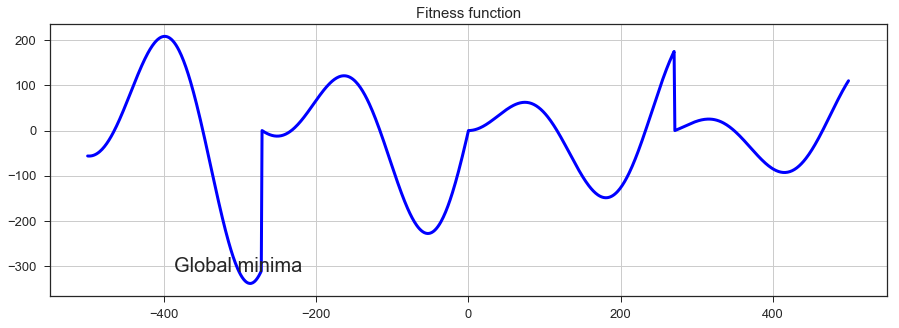

In [296]:
plot_fitness(f,np.array(lst))

#### Try hill climbing (descent) with `x0`=220. It gets stuck at a local minima!

In [371]:
res=optimize.fmin(func1,x0=220,disp=False,full_output=1)
print(f"Minima found at {res[0][0]} with function value {res[1]}")

Minima found at 180.5157470703125 with function value -148.6197312132061


#### Now give it a favorable starting guess `x0`=-380. It finds the global minima.

In [372]:
res=optimize.fmin(func1,x0=-380,disp=False,full_output=1)
print(f"Minima found at {res[0][0]} with function value {res[1]}")

Minima found at -286.6210708618164 with function value -338.18188353880555


### Random restarts

In [383]:
# Number of random restarts
num_restarts=50

In [384]:
lst_minima=[]
global_found=0 #A count variable to count how many times global minima could be found by the algorithm
for i in range(num_restarts):
    # Choose a random integer between -500 and 500
    init=np.random.randint(-500,500)
    res=optimize.fmin(func1,x0=init,disp=False,full_output=1)
    if int(res[0][0])==-286:
        global_found+=1
    lst_minima.append(res[0][0])

print(f"With {num_restarts} random restarts, the algorithm could find global minima {global_found} times")

With 50 random restarts, the algorithm could find global minima 9 times


## Simulated Annealing
### Finding minima of the same fitness function with the routine `scipy.optimize.basinhopping()`

Simulated annealing (SA) is a **probabilistic technique** for approximating the global optimum of a given function. Specifically, it is a **metaheuristic to approximate global optimization in a large search space**. It is often used when the search space is discrete (e.g., all tours that visit a given set of cities). 

For problems where finding an approximate global optimum is more important than finding a precise local optimum in a fixed amount of time, simulated annealing may be preferable to alternatives such as gradient descent.

The name and inspiration come from annealing in **metallurgy**, a technique involving heating and controlled cooling of a material to increase the size of its crystals and reduce their defects. Both are attributes of the material that depend on its **thermodynamic free energy**. Heating and cooling the material affects both the temperature and the thermodynamic free energy. 

> ***The simulation of annealing can be used to find an approximation of a global minimum for a function with a large number of variables to the statistical mechanics of equilibration (annealing) of the mathematically equivalent artificial multiatomic system.***

This notion of slow cooling implemented in the simulated annealing algorithm is interpreted as a slow decrease in the probability of accepting worse solutions as the solution space is explored. **Accepting worse solutions is a fundamental property of metaheuristics because it allows for a more extensive search** for the global optimal solution. 

In general, the simulated annealing algorithms work as follows. At each time step, the algorithm randomly selects a solution close to the current one, measures its quality, and then decides to move to it or to stay with the current solution based on either one of two probabilities between which it chooses on the basis of the fact that the new solution is better or worse than the current one. During the search, the temperature is progressively decreased from an initial positive value to zero and affects the two probabilities: at each step, the probability of moving to a better new solution is either kept to 1 or is changed towards a positive value; instead, the probability of moving to a worse new solution is progressively changed towards zero. 

<br>

![Simulated annealing](https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif)

#### `x0`=-200, `T`=1.0, `stepsize`=0.5. It finds a local minima!

In [359]:
res=optimize.basinhopping(func1,x0=-200,niter=100,T=1.0,stepsize=0.5)
print(f"Minima found at {res.x} with function value {res.fun}")

Minima found at [-251.07097386] with function value -12.337884741536316


#### `x0`=-200, `T`=1.0, `stepsize`=0.5. When we increase the number of iterations `niter`, it hops around enough to find the global minima!

In [360]:
res=optimize.basinhopping(func1,x0=-200,niter=2000,T=1.0,stepsize=0.5)
print(f"Minima found at {res.x} with function value {res.fun}")

Minima found at [-286.62103863] with function value -338.1818835389411


#### `x0`=-100, `T`=1.0, `stepsize`=0.5. It again finds a local mnima.

In [362]:
res=optimize.basinhopping(func1,x0=-100,niter=200,T=1.0,stepsize=0.5)
print(f"Minima found at {res.x} with function value {res.fun}")

Minima found at [-53.23064687] with function value -227.67346324906018


#### `x0`=-100, `T`=1.0, `stepsize`=0.5. What happens with more iterations? Does not seem to help

In [363]:
res=optimize.basinhopping(func1,x0=-100,niter=2000,T=1.0,stepsize=0.5)
print(f"Minima found at {res.x} with function value {res.fun}")

Minima found at [-53.23064704] with function value -227.67346324906018


#### `x0`=-100, `T`=10.0, `stepsize`=0.5. What happens with higher temperature? Does not seem to help

In [385]:
res=optimize.basinhopping(func1,x0=-100,niter=200,T=10.0,stepsize=0.5)
print(f"Minima found at {res.x} with function value {res.fun}")

Minima found at [-53.23064676] with function value -227.67346324906018


#### `x0`=-100, `T`=100.0, `stepsize`=0.5. Even higher temperature? Still not finding the global minima

In [387]:
res=optimize.basinhopping(func1,x0=-100,niter=200,T=100.0,stepsize=0.5)
print(f"Minima found at {res.x} with function value {res.fun}")

Minima found at [-53.23064676] with function value -227.67346324906015


#### `x0`=-100, `T`=100.0, `stepsize`=2. Higher stepsize i.e. hopping distance? Still hopeless :(

In [388]:
res=optimize.basinhopping(func1,x0=-100,niter=200,T=100.0,stepsize=2)
print(f"Minima found at {res.x} with function value {res.fun}")

Minima found at [-53.23064665] with function value -227.67346324906018


#### `x0`=-100, `T`=10.0, `stepsize`=2. But now when we increase number of iterations `niter` with higher stepsize, we find the global minima!

In [391]:
res=optimize.basinhopping(func1,x0=-100,niter=2000,T=10.0,stepsize=2)
print(f"Minima found at {res.x} with function value {res.fun}")

Minima found at [-286.62103836] with function value -338.1818835389411


## What we learned from this 1-dimensional experiment

This 1-dimensional function optimization was useful to show key properties of the randomized local search algorithms.
* Both hill climbing and simulated annealing get stuck at local minima often
* We can try random restarts for hill climb and depending on the function complexity it will find global minima for a fraction of the time
* Simulated annealing has hyperparameters such as the anneal temperature and step-size (hopping distance) which can be tweaked to reach global minima even when we start from a bad position. This parameters essentially help the algorithm ***jump over*** the local hills to reach the global minimum valley.

### We will apply these learning to train a neural network next